# MathAData - Géométrie dans le plan, droites


# Classification des images de 2 et de 7


!!! abstract But du TP  
Dans ce Notebook, nous allons construire un algorithme qui prédit si un 2 ou un 7 est écrit sur une image.  
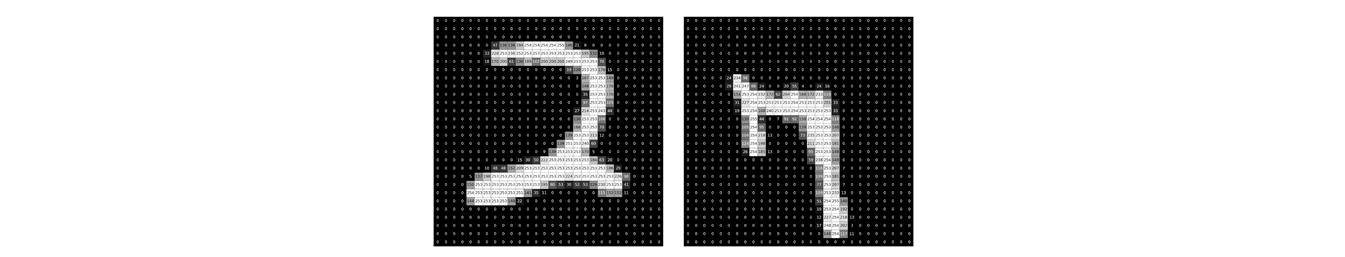  
!!!


!!! tip Exécuter une cellule  
Pour commencer, cliquez sur la cellule de code ci-dessous puis appuyez sur le bouton <span style="display: inline-block; margin: auto 1rem; vertical-align: middle">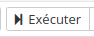</span> ou les touches <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>.  
Lorsque le code aura été executé, un nombre apparaîtra entre les crochets sur la gauche : <span style="display: inline-block; margin: auto 1rem; vertical-align: middle"></span>  
!!!
!!! warning  SOS <details><summary>  
   Rien ne se passe ? Ou tu veux récupérer tes réponses ? Clique ici  </summary>   
Clique sur le bouton **deux petites flèches**<span style="display: inline-block; margin: auto 1rem; vertical-align: middle">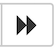</span>sur la barre d'outils en haut du notebook.  
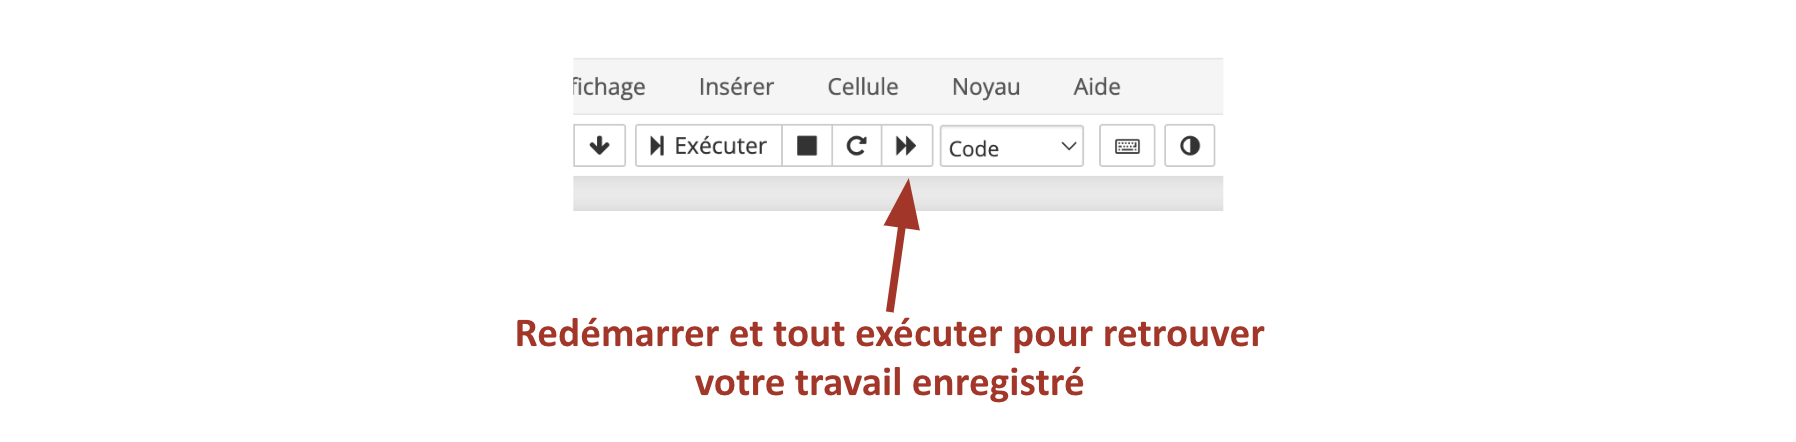  
Clique ensuite sur le bouton rouge ***Relancer et exécuter toutes les cellules***.</details>  
!!!


In [ ]:
from utilitaires_mnist import *
from utilitaires_S_GEO_equation_de_droite import *

!!! tip Base de données  
Nous avons environ 6 000 images.  
**Exécutez la cellule suivante** pour afficher la base de donnée. Vous pouvez cliquer sur une ligne pour afficher l'image correspondante et vous déplacer avec les flèches haut et bas du clavier.  
!!!


In [ ]:
affichage_banque()

validation_execution()

!!! question 1) Combien d'images de 7 y a-t-il parmi les 10 premières images ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_7 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre()

!!! question 2) Combien d'images contient la base de données au total ?
 **Remplacez les `...`** dans la cellule suivante par votre réponse **puis exécutez**.  
!!!


In [ ]:
nombre_total_images = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_nombre_total()

## A. Point de départ


!!! tip Fonctionnement d'un algorithme  
Un algorithme reçoit une donnée, effectue des opérations, et donne une réponse.  
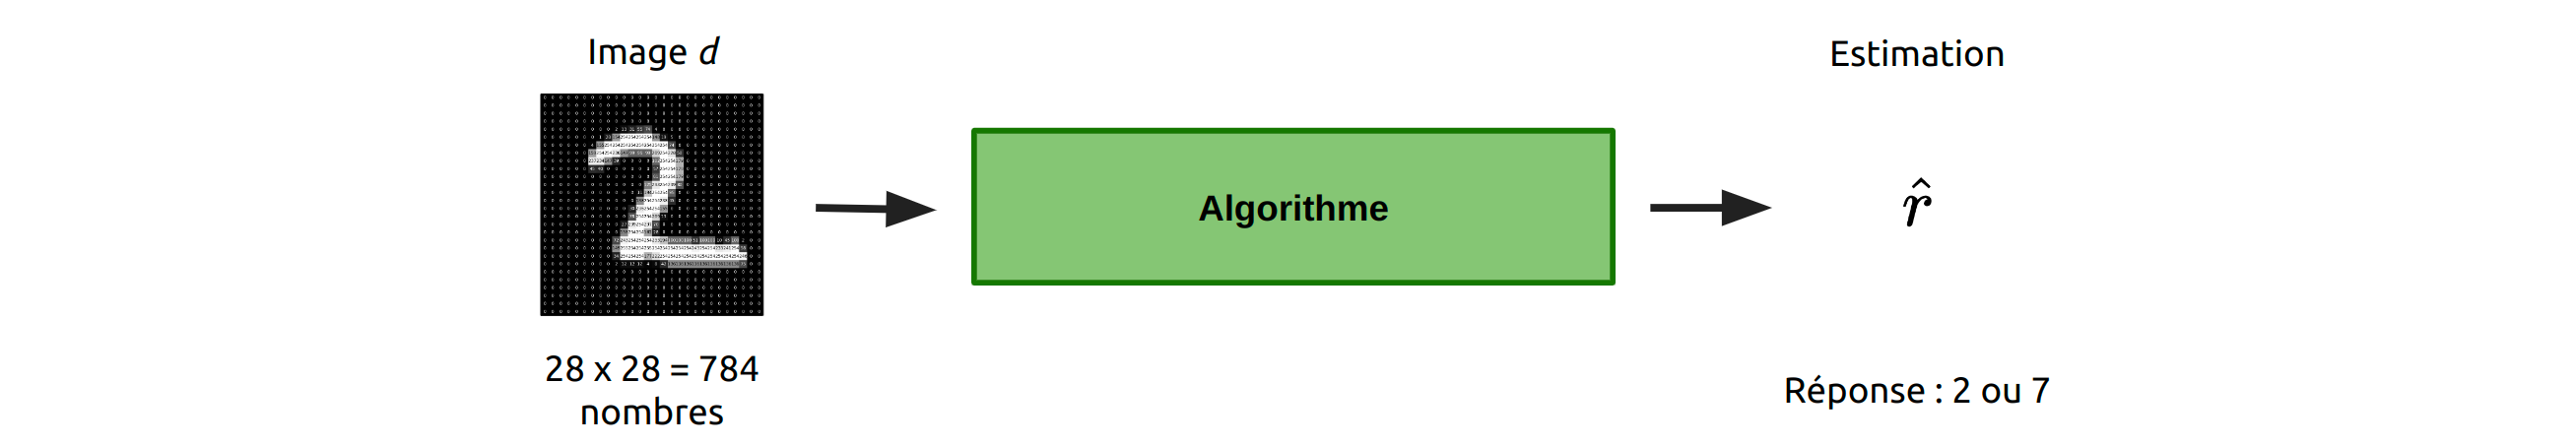  
!!!
!!! abstract Algorithme fainéant : Renvoyer toujours 2.   
LucIA ne veut pas se fatiguer et propose un algorithme très simple **qui renvoie toujours 2**.  
!!!


In [ ]:
import utilitaires_common

def algorithme(d):
    return 2

validation_execution_algo_fixe()

!!! question 3) Que répond l'algorithme fainéant pour ces trois images ?
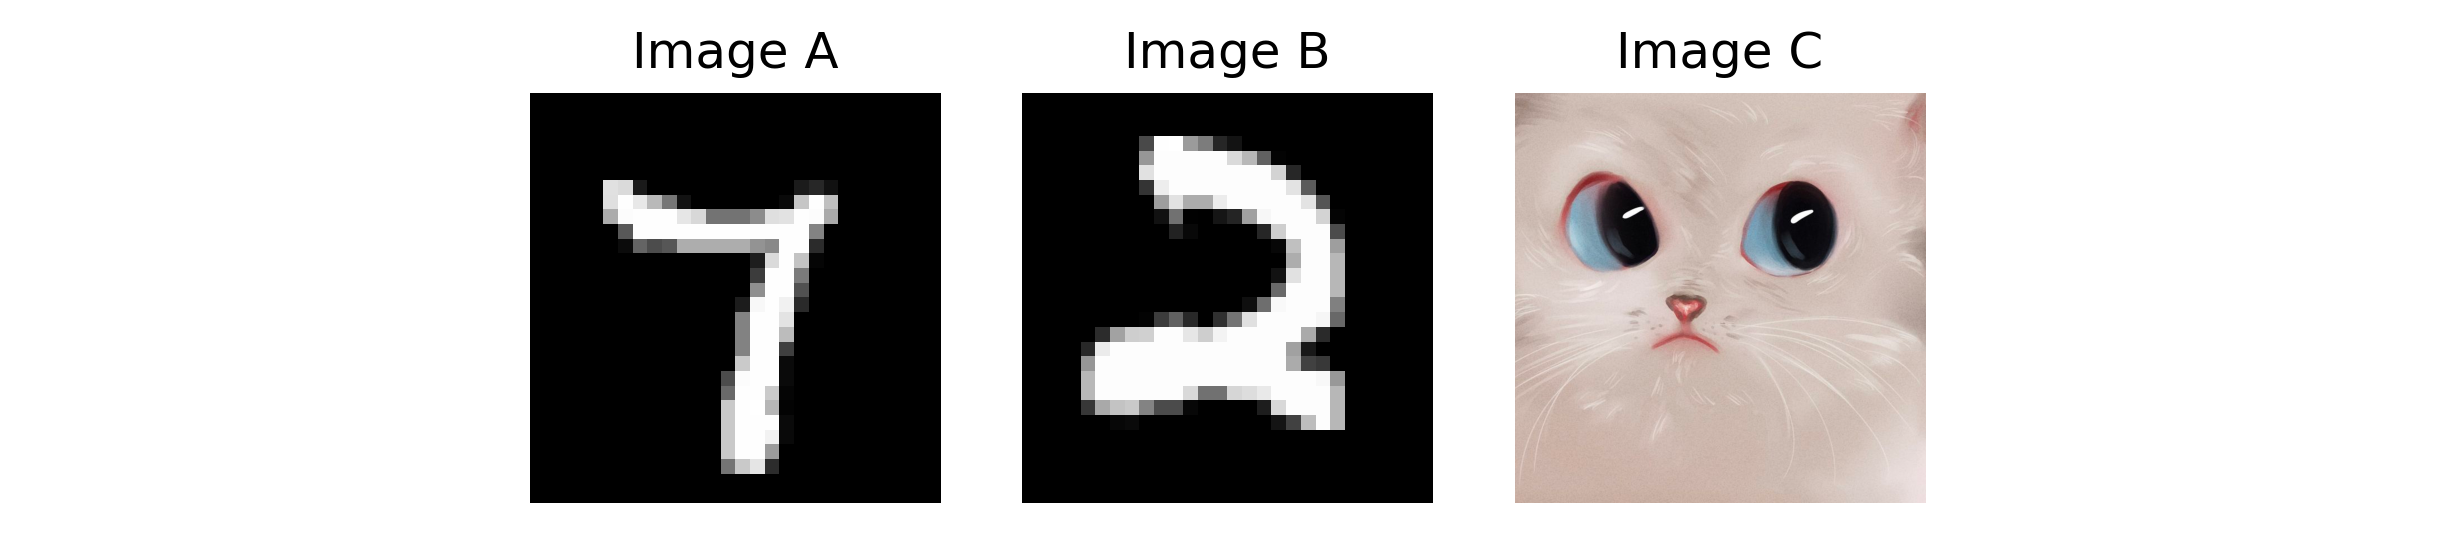  
**Remplacez les `...`** dans la cellule suivante par votre réponse  **puis exécutez**.  
!!!


In [ ]:
Reponse_Image_A = ...
Reponse_Image_B = ...
Reponse_Image_C = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_faineant()

!!! info Le pourcentage d'erreur : un moyen d'évaluer votre algorithme  
Voici la formule donnant la proportion d'erreur :  
$$\text{erreur} = \frac{\text{Nombre d'images mal classées}} {\text{Nombre total d'images}}$$  
Plus le pourcentage d'erreur de votre algorithme est bas meilleure est votre solution.  
Une image mal classée est une image pour laquelle l'algorithme a donné une estimation différente de la vraie classe de l'image:  
$$\hat r \neq r.$$  
Remarque :   
Une proportion peut s'écrire en pourcentage en multipliant par $100\%$.  
Par exemple si l'algorithme fait 4 erreurs sur 20 images : $$\text{erreur} = \frac{4}{20}=0,2=0,2\times100\% = 20\%.$$  
!!!


In [ ]:
affichage_banque(showPredictions=True)

validation_execution_calcul_score()

!!! question 4) Quel est le pourcentage d'erreur de l'algorithme sur les 10 premières images ?
Calculez le pourcentage d'erreur de l'algorithme sur les 10 premières images.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_fixe()

!!! tip Taux d'erreur sur toutes les images  
**Exécutez la cellule suivante** pour calculer le pourcentage d'erreur sur l'ensemble des 6 000 images.  
!!!


In [ ]:
calculer_score_etape_1()

## B. Image numérique


!!! abstract Qu'est ce qu'une image ?  
Pour diminuer notre erreur, notre algorithme doit "regarder" l'image. On doit comprendre ce qu'est l'image pour l'ordinateur.  
!!!
!!! tip Calcul sur l'image  
Pour l'ordinateur, une image est un tableau de nombres. Chaque nombre correspond à un pixel de l'image. Chaque pixel vaut entre 0 et 255, 0 pour noir et 255 pour blanc.  
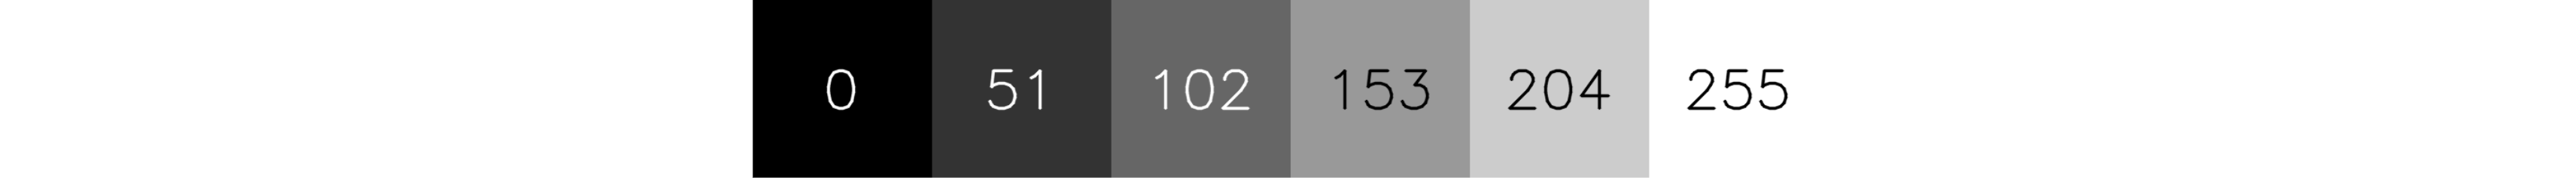  
**Exécutez la cellule suivante pour afficher une image $d$.**  
!!!


In [ ]:
affichage(d)
affichage_tableau(d)

validation_execution_affichage()

!!! question 5) Quelle est la valeur du pixel positionné en ligne 18 et colonne 15 ?
Lisez dans le tableau la valeur du pixel et complétez sa valeur **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
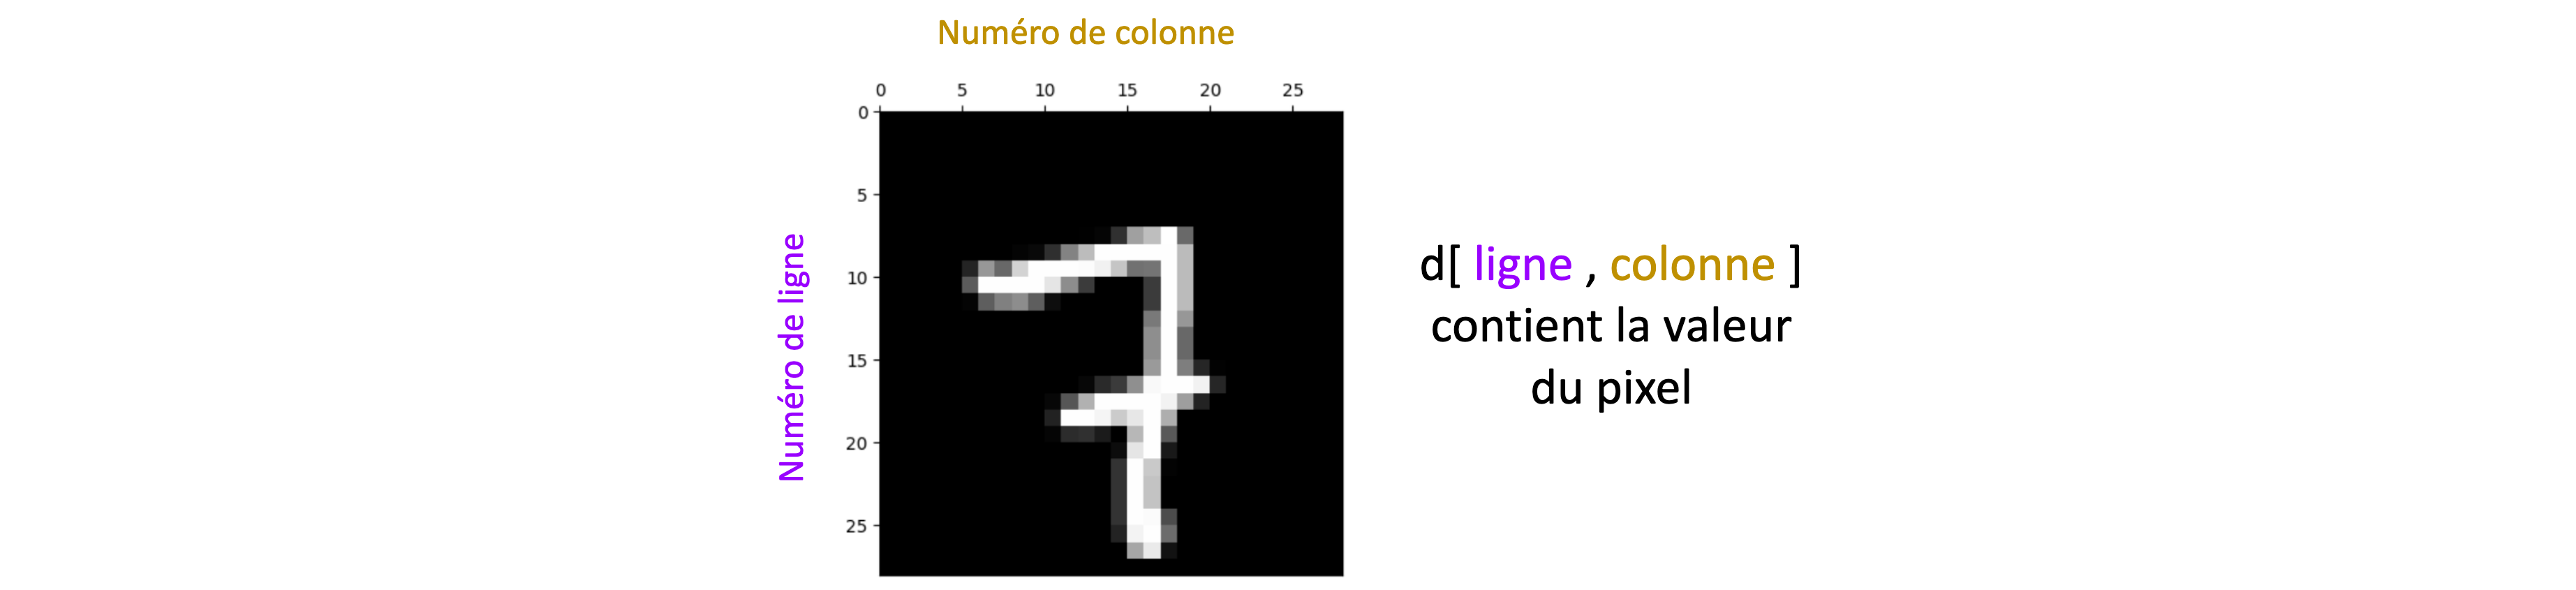  
Remarque : Dans le cas des tableaux python la première coordonnée est le numéro de ligne, la deuxième le numéro de colonne : (ligne,colonne).  
!!!


In [ ]:
pixel = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_pixel()

!!! question 6) Transformez le pixel (17,15) en pixel noir
**Remplacez ci-dessous les `...`** par la nouvelle valeur à donner au pixel pour qu'il soit noir **puis exécutez**.  
!!!


In [ ]:
d[17,15] = ...

# NE PAS TOUCHER CES LIGNES
validation_question_pixel_noir()
affichage(d,(17,15))
affichage_tableau(d,(17,15))

## C. Caractéristiques


### Calcul des caractéristiques


!!! info Caractéristique d'une image  
Pour diminuer notre erreur, notre algorithme doit maintenant utiliser l'image au lieu de répondre au hasard.  
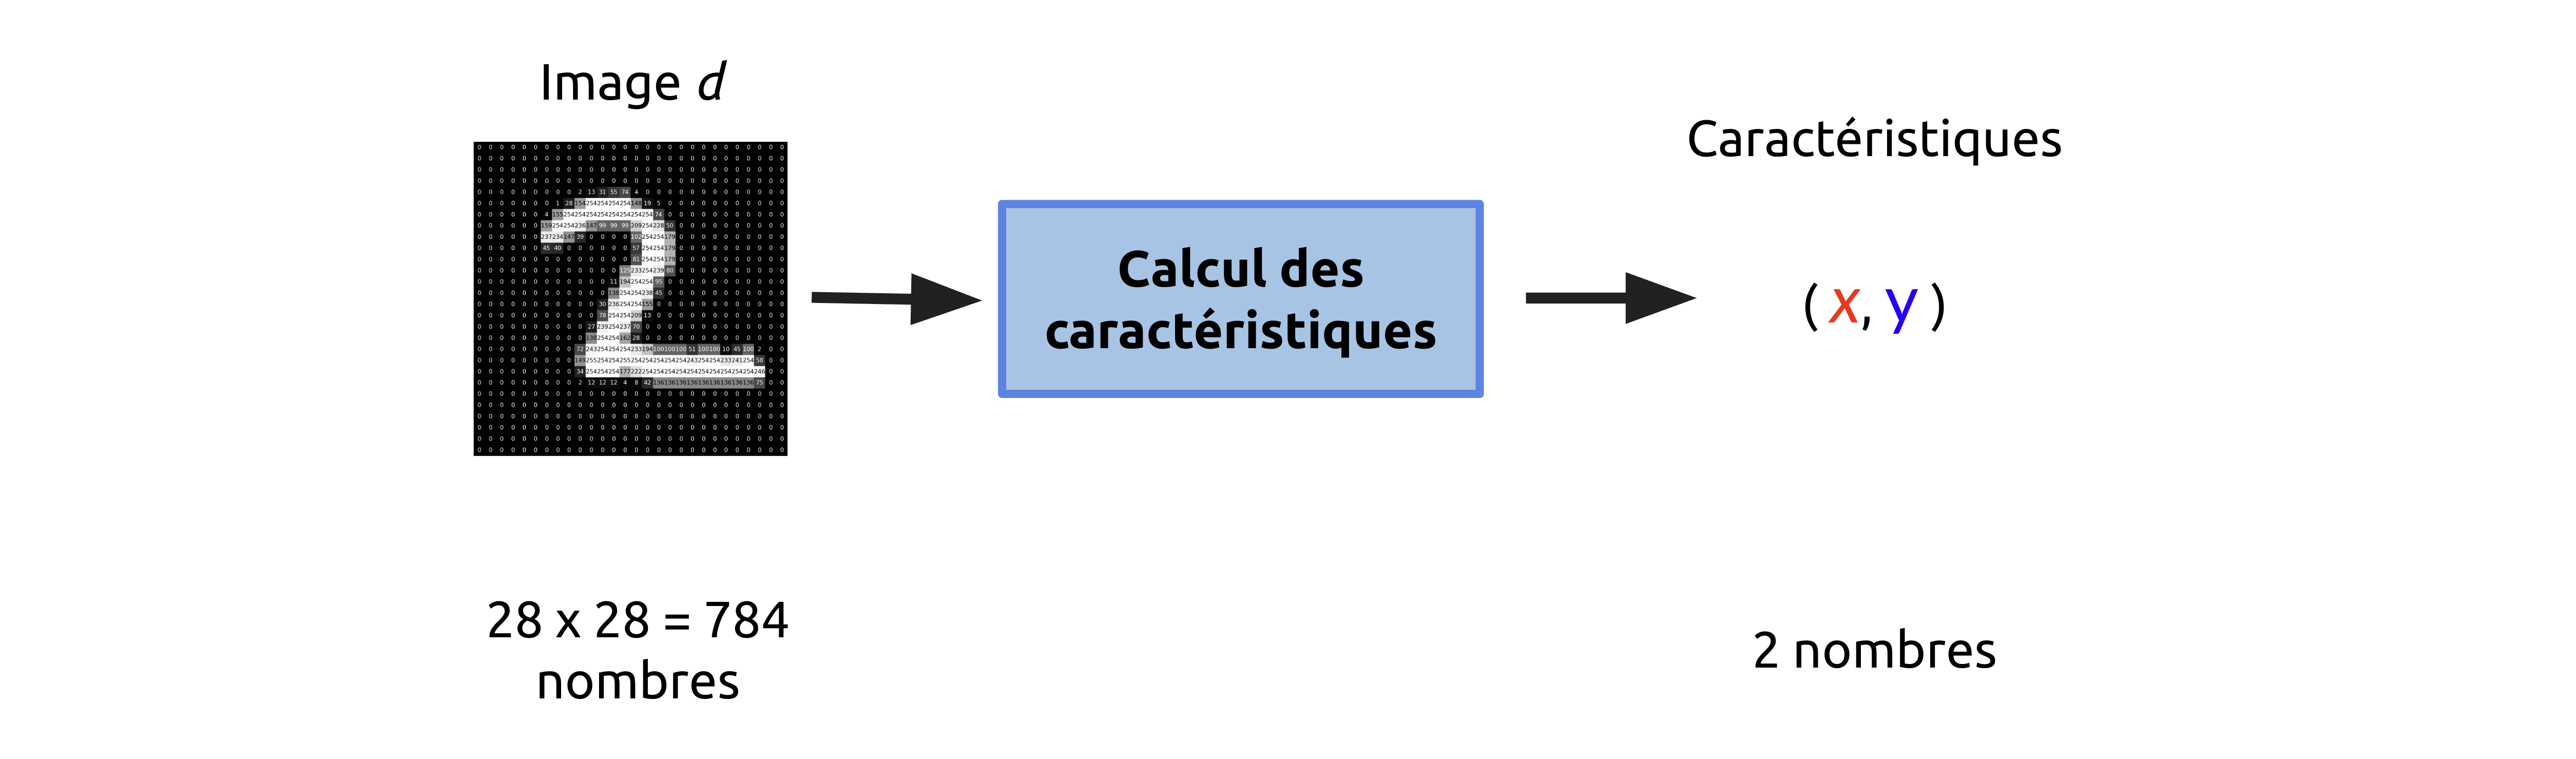  
Les caractéristiques notées $x, y, ...$ permettent de simplifier l'image en gardant peu de nombres.  
!!!


!!! tip La moyenne  
Pour résumer les valeurs de certains pixels en une seule valeur, on fait la moyenne de ces pixels.  
!!!


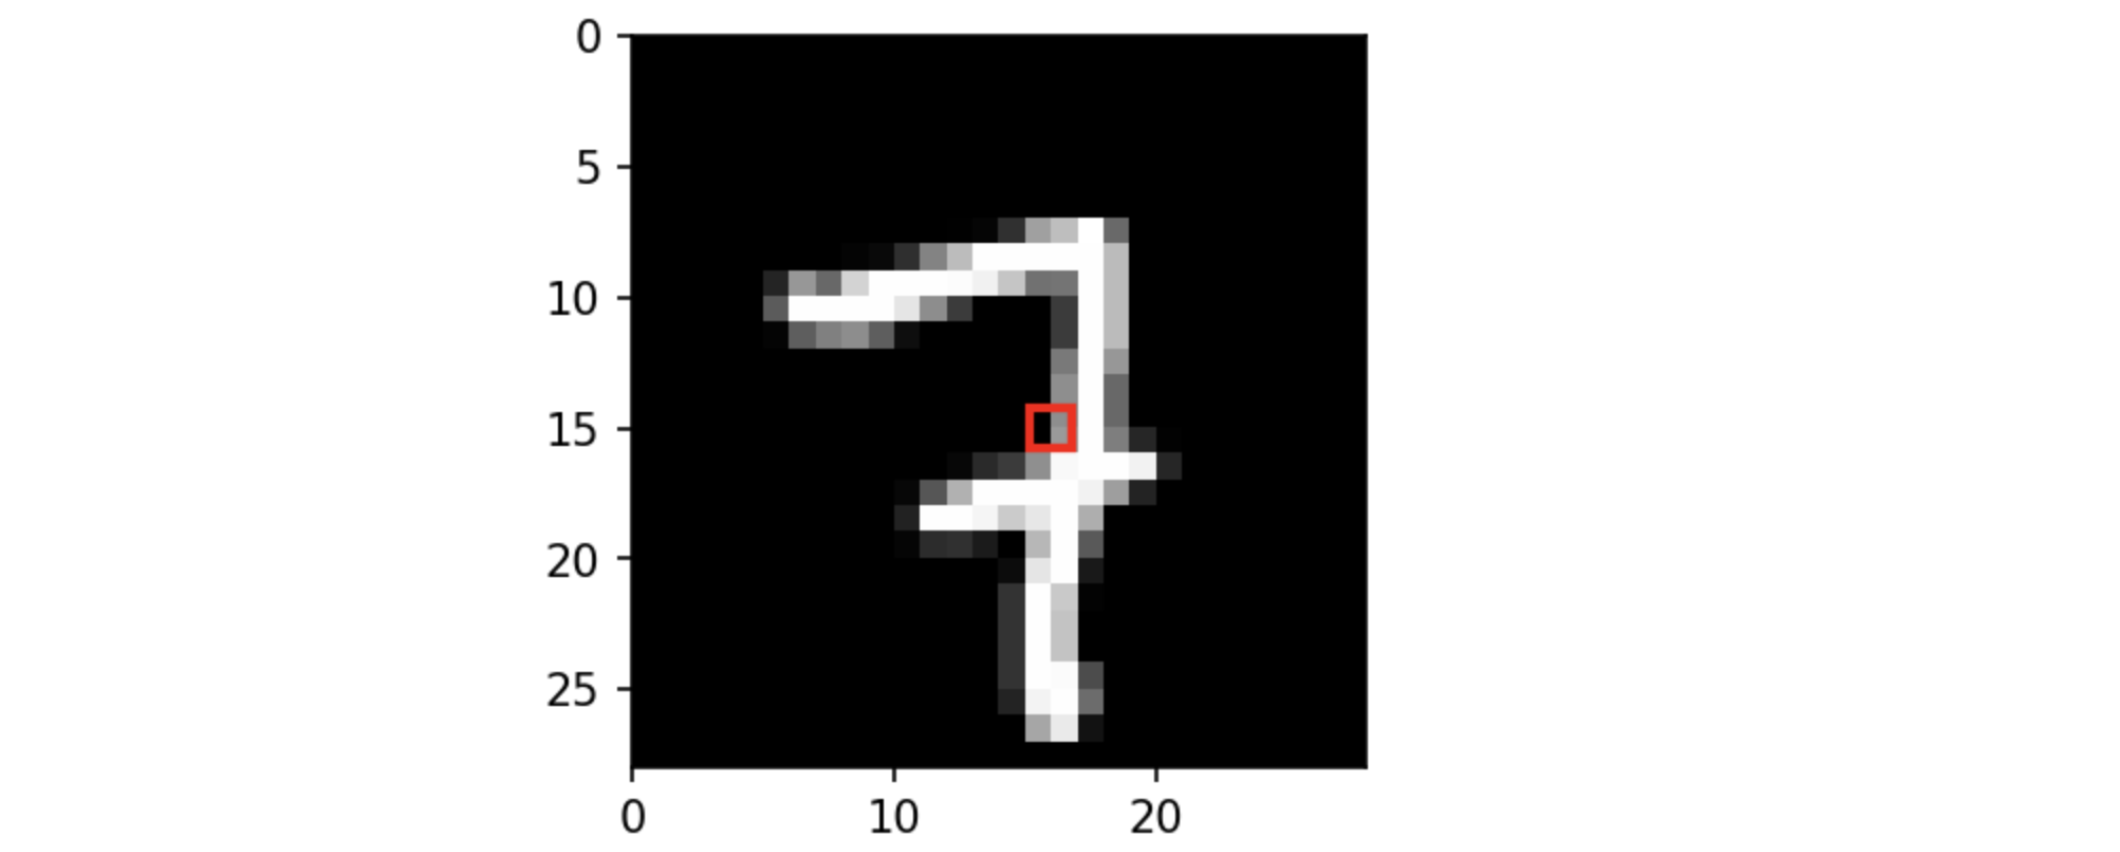  
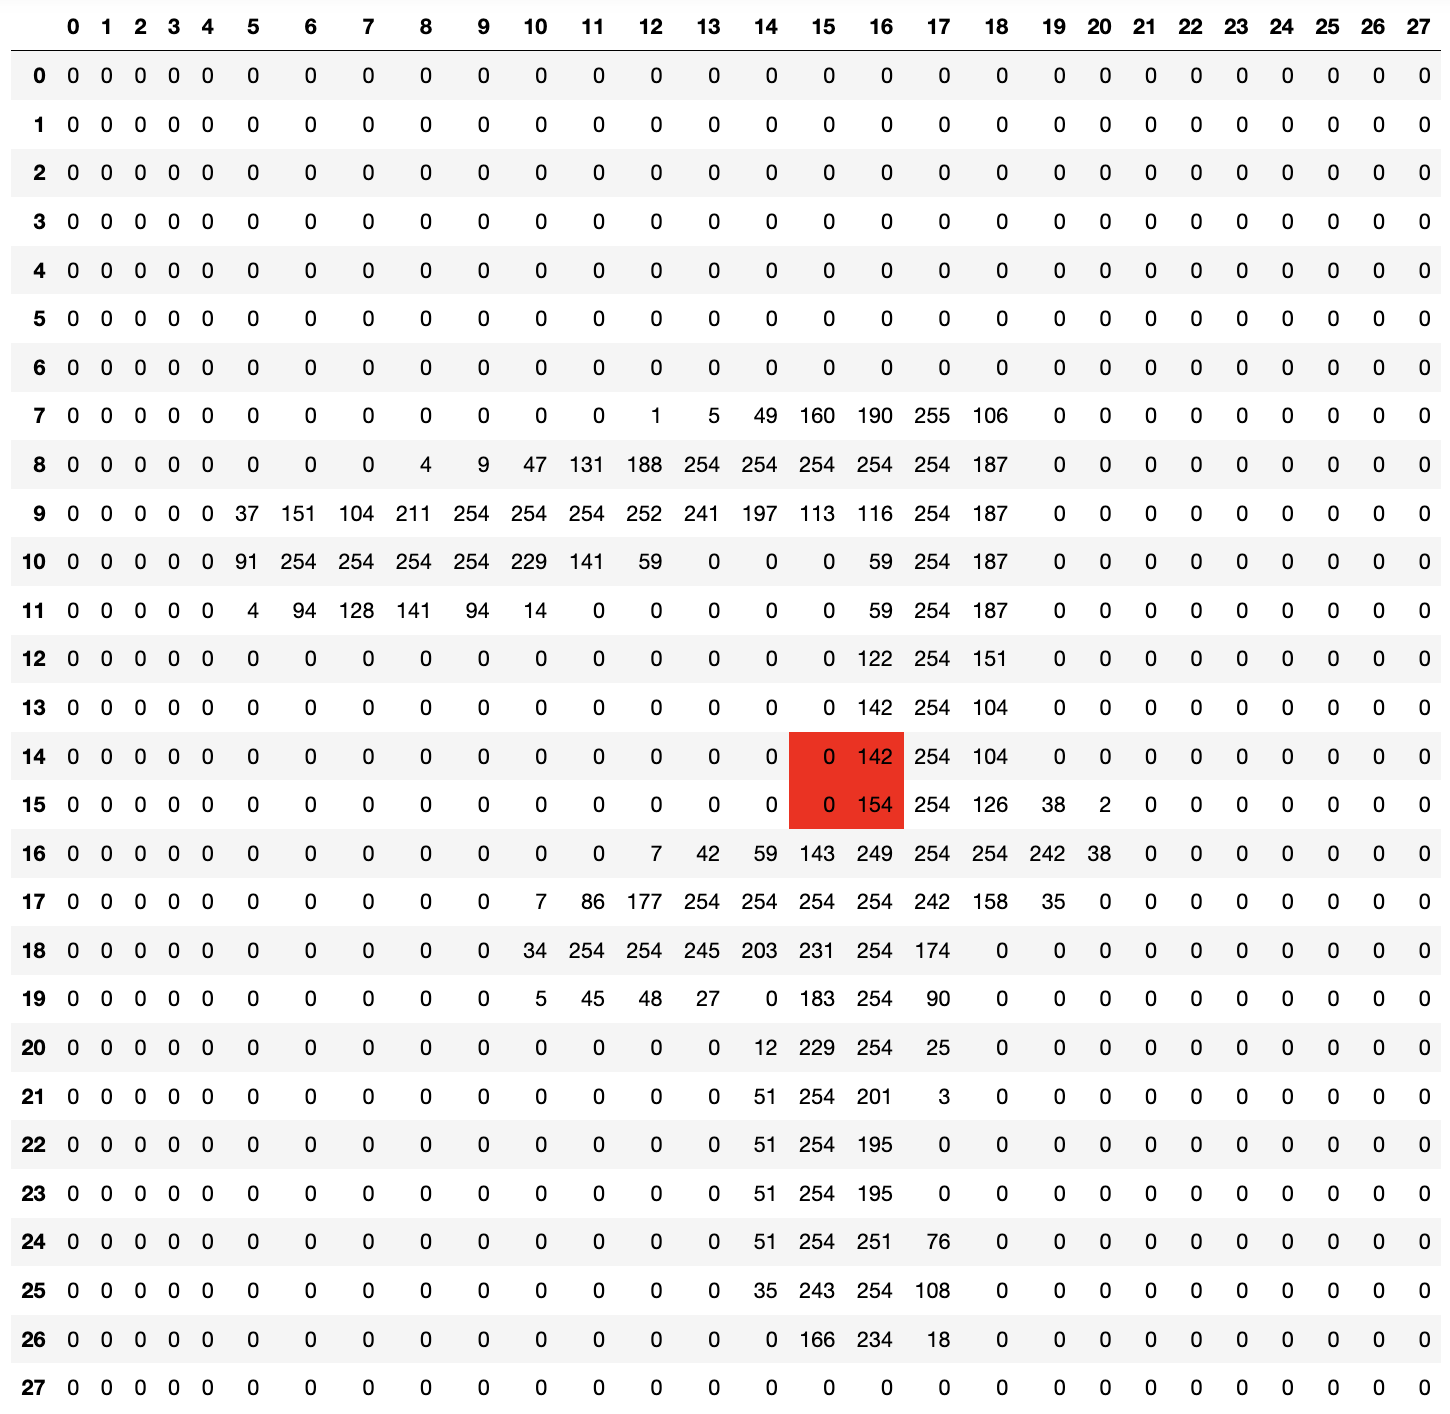
!!! question 7) Calculez la moyenne sur les pixels rouges
Calculez la moyenne des pixels de la zone surlignée en rouge. Donnez votre réponse **à la place des `...`** dans la cellule ci-dessous **puis exécutez**.  
!!!


In [ ]:
moyenne_zone_4pixels = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_moyenne()

!!! tip Moyenne sur 2 zones différentes  
Nous allons commencer avec deux caractéristiques de référence : la moyenne sur la moitié haute de l'image et la moyenne sur la moitié basse.  
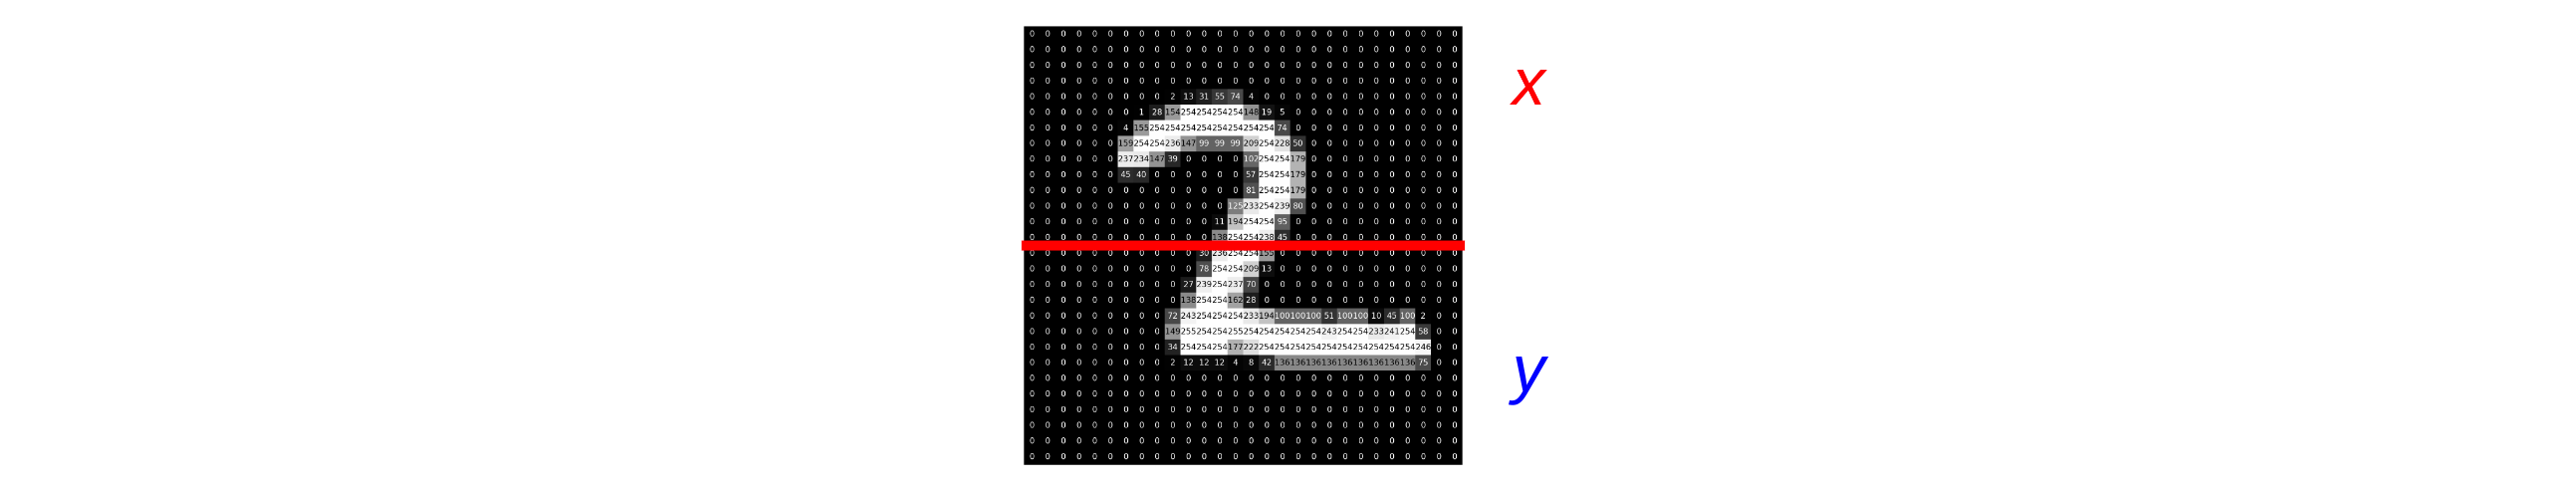  
**Exécutez la cellule suivante** pour voir un exemple.  
!!!


In [ ]:
affichage_2_geo()

validation_execution_2_caracteristiques()

!!! question 8) Quelle image correspond à chaque couple ($x,y$) ?
On a calculé pour les deux images ci-dessus leurs caractéristiques $(x,y)$. Regardez les deux images et le tableau pour déduire quelle image correspond à chaque couple de moyennes $(x,y)$.  
**Remplacez les `...`** dans la cellule suivante avec 2 et 7 dans le bon ordre **puis exécutez**.  
!!!


In [ ]:
r1 = ...
r2 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_2_caracteristiques()

### Visualisation dans le plan


!!! info Visualisation dans le plan  
Nous avons maintenant 2 valeurs $(x, y)$ associées à chaque image. Nous pouvons placer les images dans un plan en utilisant x et y comme coordonnées.  
**Exécutez la cellule suivante** pour afficher les points correspondant à 2 images.  
!!!


In [ ]:
tracer_2_points()
validation_execution_2_points()

!!! question 9) Donnez les coordonnées $(x, y)$ des points A et B
Complétez les coordonnées dans la cellule suivante **puis exécutez**. On acceptera des valeurs arrondies.  
!!!


In [ ]:
A = (..., ...)

B = (..., ...)

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_2_points()

!!! info Nuages de points  
Nous allons maintenant étudier la répartition dans le plan des 2 et des 7. Plus notre caractéristique est discriminante, plus on peut observer 2 nuages (groupes) de points distincts  
**Exécutez la cellule suivante** pour afficher les points correspondant aux 200 premières images de l'ensemble d'entraînement.  
!!!


In [ ]:
tracer_200_points()
validation_execution_200_points()

!!! question 10) Quel nuage de point correspond à quelle classe ?
A votre avis, les points de couleur bleue correspondent aux images de 2 ou de 7 ?  
**Remplacez les `...`** dans la cellule suivante avec 2 ou 7 dans le bon ordre **puis exécutez**  
!!!


In [ ]:
classe_points_bleus = ...
classe_points_oranges = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_couleur()

### Classification


!!! info Classification  
La classification est la dernière étape de l'algorithme. Il faut trouver un moyen de donner une réponse 2 ou 7 à partir des caractéristiques $x, y$.  
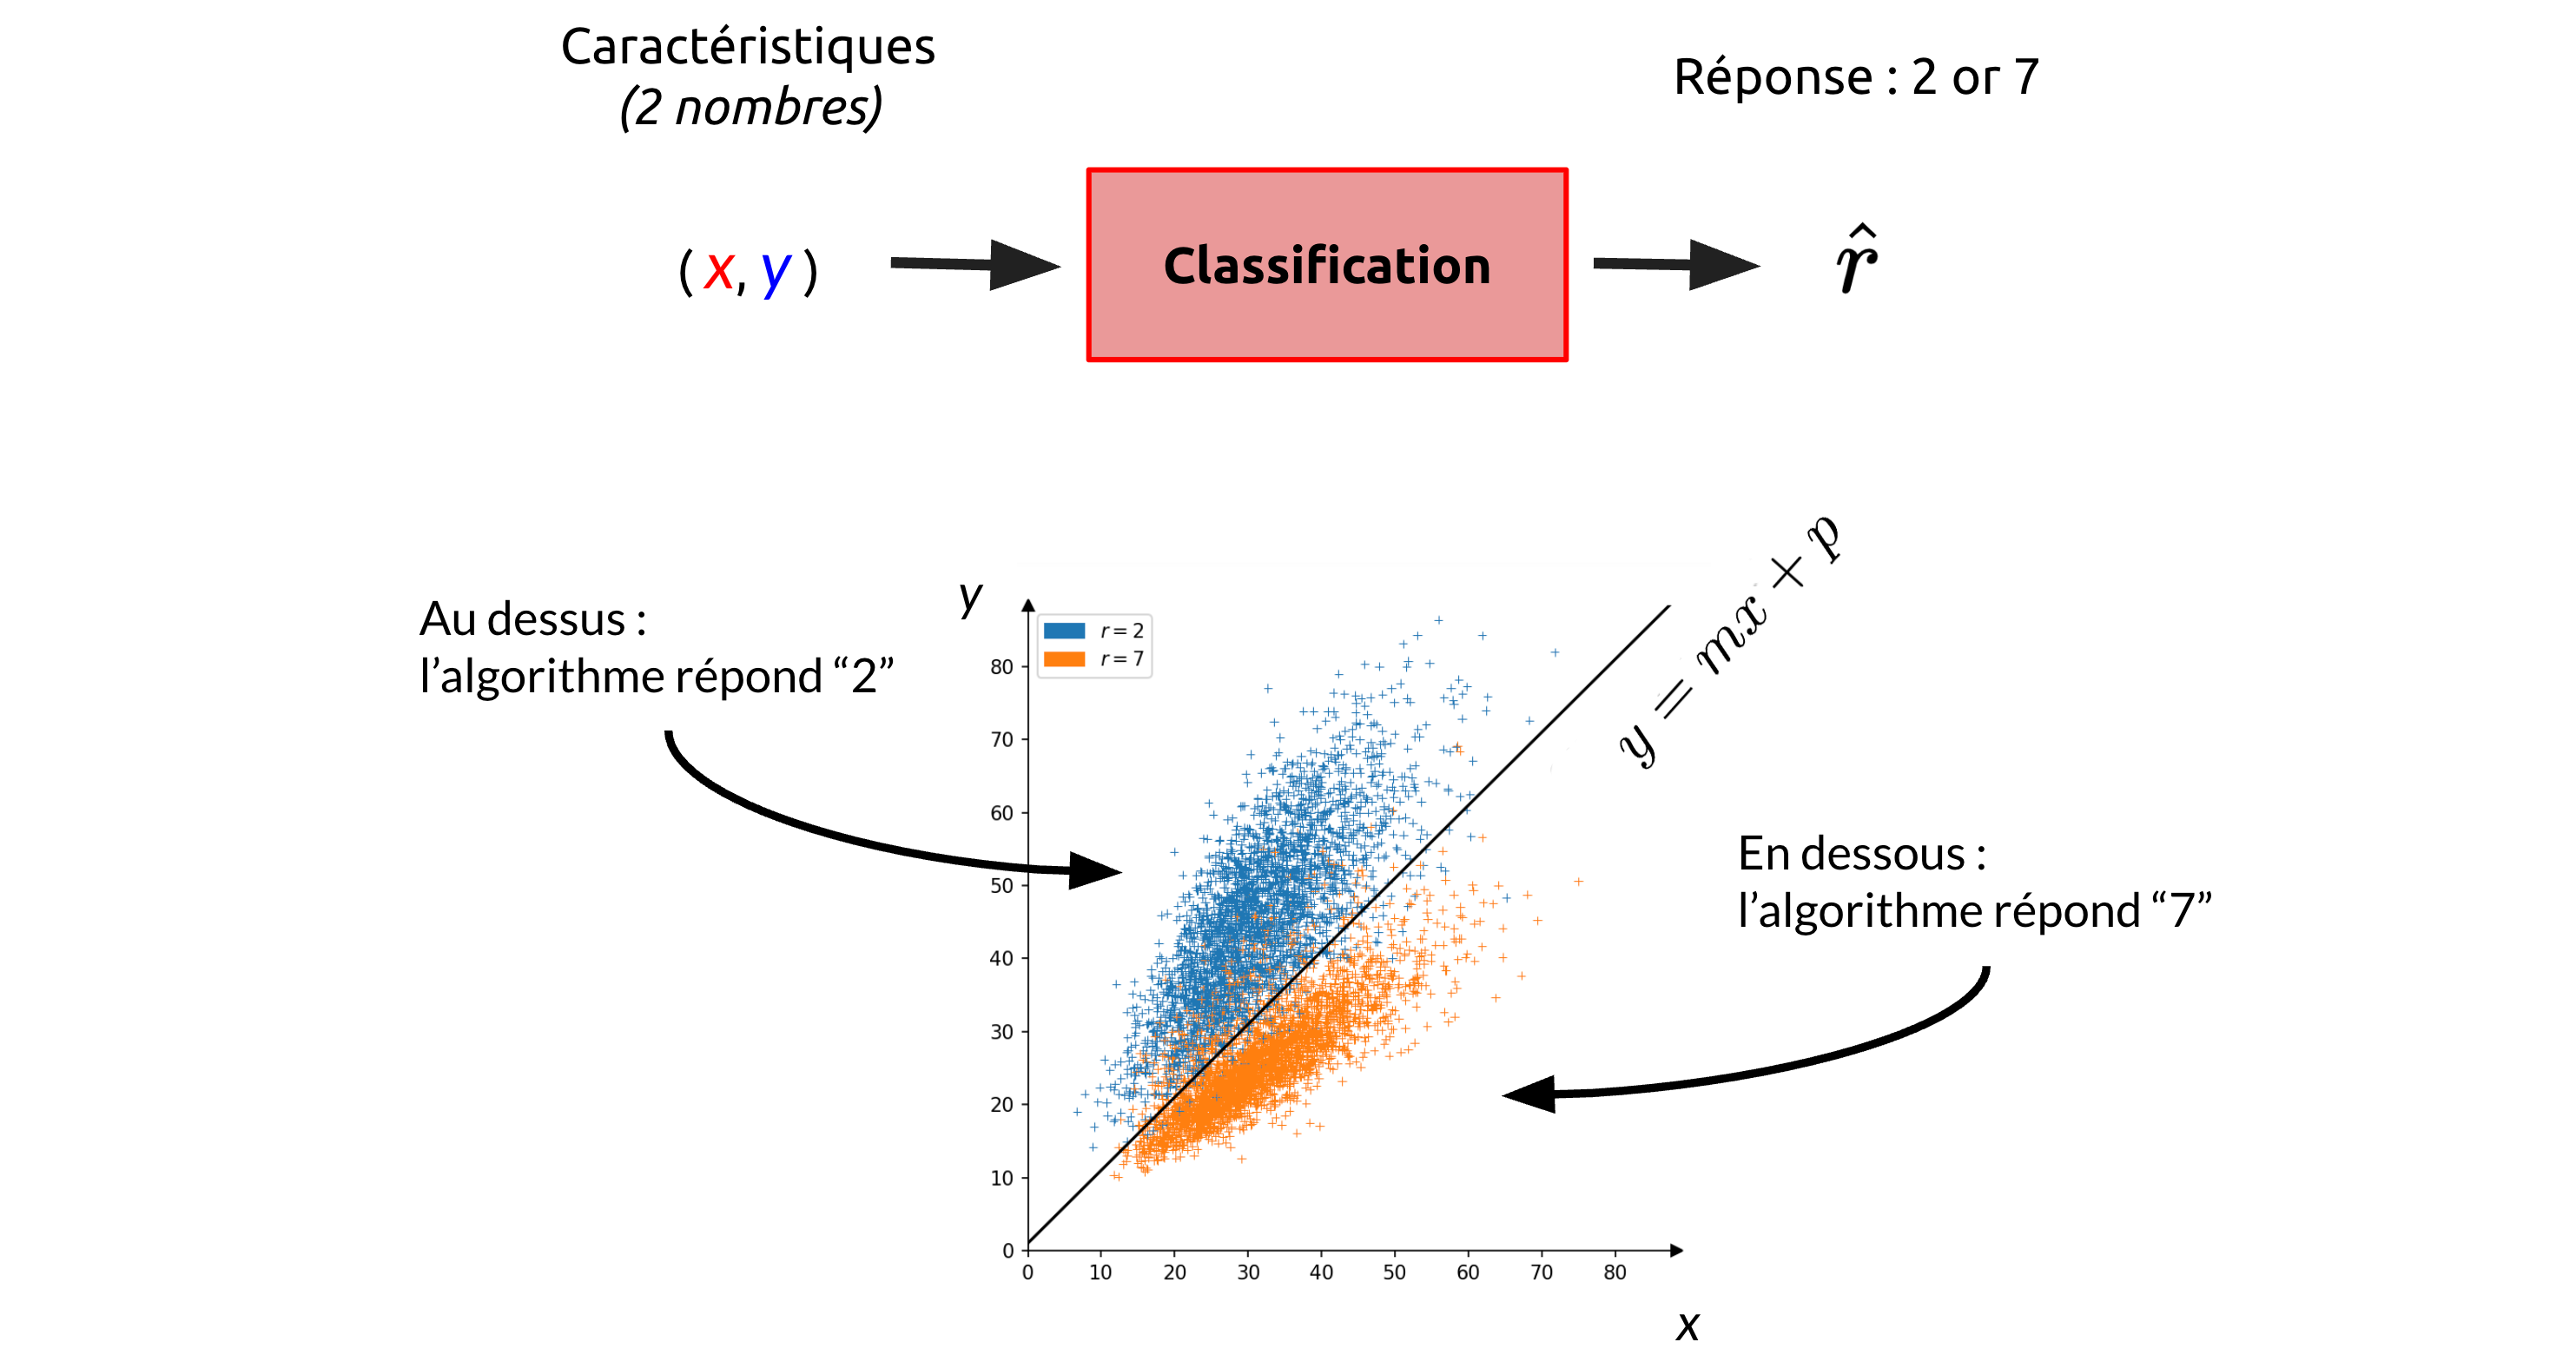  
!!!
!!! info Découpage du plan par une droite  
En deux dimensions, on peut utiliser une droite pour séparer les points en deux groupes. L'équation de la droite est de la forme  
$$y = mx + p$$  
On exprime $y$ en fonction de $x$ avec deux paramètres :  
- $m$ : le coefficient directeur de la droite  
- $p$ : l'ordonnée à l'origine de la droite donc la valeur de $y$ pour $x = 0$  
  
**Exécutez la cellule suivante** pour voir le découpage par une droite avec les points pour 10 images.  
!!!


In [ ]:
tracer_10_points_droite()
validation_execution_10_points()

!!! question 11) Quel est le pourcentage d'erreur sur ce schéma ?
Calculez le pourcentage d'erreur pour ces 10 images et cette droite. Les points au dessus de la droite sont classés comme 2 par l'algorithme et ceux en dessous comme des 7.  
**Remplacez les `...`** dans la cellule suivante par votre réponse (uniquement le nombre sans le %) **puis exécutez**.  
!!!


In [ ]:
erreur_10 = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_score_droite()

!!! tip A vous  
Vous allez maintenant chercher la meilleure droite pour résoudre le challenge. **Exécutez la cellule suivante** pour afficher les points pour toutes les images de la base de données.  
!!!


In [ ]:
tracer_points_droite()

validation_execution_tracer_points_droite()

!!! question 12) Trouvez une droite permettant d'obtenir moins de 8% d'erreur
Ajustez les paramètres $m$ et $p$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
Quand vous aurez trouvé une bonne droite, **exécutez la cellule suivante** pour passer à la suite.  
!!!


In [ ]:
calculer_score_droite()

#### Détail du calcul de l'erreur


!!! abstract Classification linéaire  
Pour faire la classification avec la droite :   
- Nous avons choisi 2 paramètres $m$ et $p$ pour définir une droite séparant les deux classes  
- Nous avons déterminé que l'algorithme devait estimer $\hat r = 2$ pour les points au dessus de la droite  
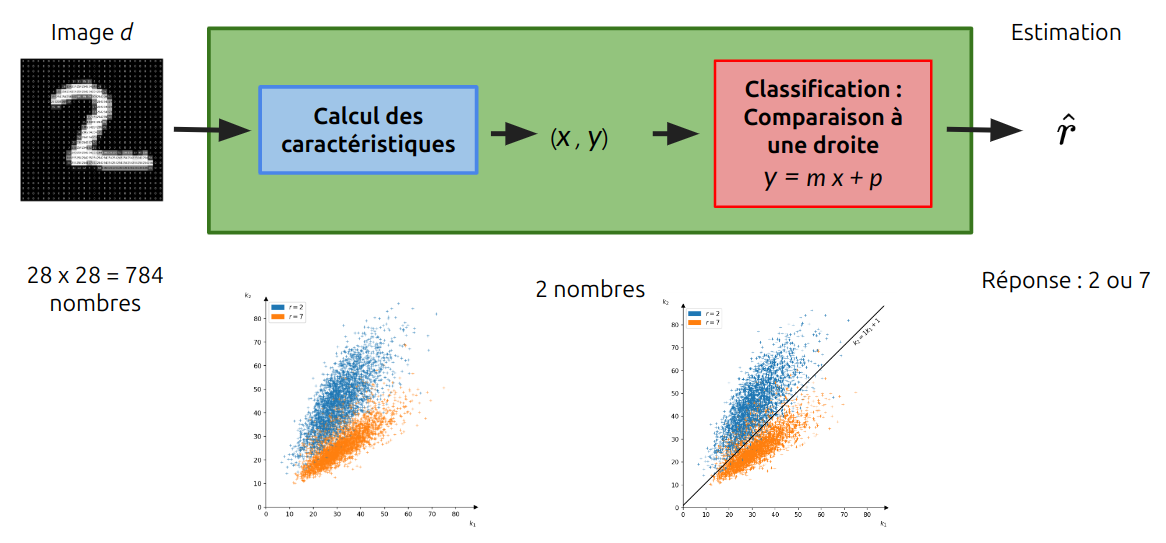  
!!!
!!! info Comment l'ordinateur fait-il pour savoir si un point est au dessus de la droite ?  
L'ordinateur ne peut pas faire de comparaison visuelle. Il doit donc faire des calculs avec les coordonnées des points et l'équation de la droite.  
**Exécutez la cellule suivante** pour voir un exemple.  
!!!


In [ ]:
tracer_point_droite()
validation_execution_point_droite()

!!! question 13) Quelles sont les coordonnées du point M ?
On cherche à savoir si le point $A$ est sous ou au-dessus de la droite, à partir de ses coordonnées.  
On introduit le point $M$ : même abscisse que $A$ mais appartient à la droite.  
**En utilisant l'équation de la droite**, complétez les coordonnées de $M$ dans la cellule ci-dessous.  
!!!


In [ ]:
abscisse_M = ...
ordonnee_M = ...

# NE PAS TOUCHER APRES CETTE LIGNE
validation_question_equation()

### Essayons de trouver 2 meilleures caractéristiques !


!!! tip Nouvelles zones de l'image  
**Exécutez la cellule suivante** pour voir les nouvelles zones de l'image que nous avons choisies.  
!!!


In [ ]:
A_1 = (7, 7)       # <- coordonnées du point A1
B_1 = (20, 20)     # <- coordonnées du point B1


A_2 = (14, 14)     # <- coordonnées du point A2
B_2 = (23, 23)     # <- coordonnées du point B2



# NE PAS TOUCHER CES LIGNES
affichage_zones_custom(A_1, B_1, A_2, B_2)

validation_execution_def_caracteristiques_ripou()

!!! question 14) Que pensez-vous des nuages de points associés à ces deux zones ?
Les nuages de points sont-ils bien séparés ?  
Pourquoi d'après-vous ?  
Observez les deux zones en remontant à la cellule précédente pour vous aider à répondre.  
**Exécutez la cellule suivante pour continuer.**  
!!!


In [ ]:
validation_execution_scatter_caracteristiques_ripou()

!!! question 15) Changer les zones choisies pour définir vos propres caractéristiques
**Exécutez la cellule suivante** puis sélectionnez deux zones sur l'image. Les caractéristiques $x$ et $y$ seront la moyenne des pixels dans chacune des zones.  
Cliquez sur le bouton zone1 ou zone2 pour choisir la zone à sélectionner, puis cliquez sur l'image et laissez appuyé jusqu'à avoir selectionné la zone souhaitée.  
!!!


In [ ]:
afficher_customisation()

validation_execution_afficher_customisation()

!!! question 16) Trouvez la meilleure droite
Ajustez les paramètres $m$ et $p$ pour trouver une bonne droite séparatrice. Le pourcentage d'erreur est la proportion de points d'un groupe qui sont du mauvais côté de la droite.  
**Exécutez la cellule suivante** pour passer à la suite quand vous aurez moins de 6% d'erreur. Il faut pour ça trouver deux bonnes zones et ajuster la droite.  
!!!


!!! warning SOS <details> <summary>Rien ne se passe ? Clique ici  </summary>  
 Avec la souris sélectionne une zone dans une des images :   
-clique sur zone 2    
-sélectionne une zone   
-clique sur zone 1  
-selectionne une zone  
  
 L'enjeu est de trouver des zones permettant de différencier les 2 et les 7.  </details>  
!!!


In [ ]:
calculer_score_custom_droite()

!!! abstract Fin du Notebook  
Dans ce TP, vous avez :   
  
- Utilisé deux caractéristiques pour chaque image  
- Placé les images dans un plan en utilisant ces deux valeurs comme coordonnées  
- Utilisé une droite pour séparer les points en deux groupes  
- Optimisé les paramètres de la droite pour minimiser votre erreur  
  
Continuez à chercher des bonnes zones pour diminuer votre pourcentage d'erreur. Vous pouvez faire jusqu'à moins de 3% d'erreur !  
!!!
